In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.shape

(200000, 9)

In [7]:
#preprocessing data

#handling missing values and removing unwanted

print("*****Before *****")
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

df.drop(['Unnamed: 0','key'],axis =1,inplace = True)
df.drop(df[df['fare_amount'].values<=0].index,inplace=True)
df.drop(df[df['passenger_count']>10].index,inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


# Handle missing values
# We can choose to drop rows with missing values or fill them with appropriate values.

#df.dropna(inplace=True)

# To fill missing values with the mean value of the column:
df.fillna(df.mean(), inplace=True)

# Ensure there are no more missing values
missing_values = df.isnull().sum()
print("Missing values after handling:")
print(missing_values)

*****Before *****
Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
Missing values after handling:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
day_of_week          0
dtype: int64


In [8]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3


In [10]:
# Handle missing values
# We can choose to drop rows with missing values or fill them with appropriate values.

#df.dropna(inplace=True)

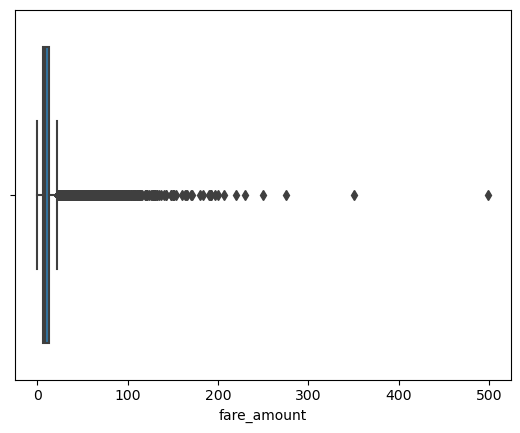

In [11]:
# 2. Identify outliers
# visualization to detect outliers.

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["fare_amount"])
plt.show()

In [12]:
# Remove rows where fare_amount is less than or equal to 0 (since Poisson can't handle that)
df = df[df['fare_amount'] > 0]

# Ensure no other invalid values like NaN are present in the dataset
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [14]:
# Check for valid latitude and longitude values
invalid_latitude = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]
invalid_longitude = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180)]

print(f"Invalid Latitude Records:\n{invalid_latitude}")
print(f"Invalid Longitude Records:\n{invalid_longitude}")

Invalid Latitude Records:
       fare_amount           pickup_datetime  pickup_longitude  \
56617          8.1 2012-03-11 07:24:00+00:00        -73.960828   
61793          8.5 2012-06-13 05:45:00+00:00        -73.951385   
75851         15.7 2011-11-05 00:22:00+00:00      -1340.648410   
91422         16.1 2011-05-18 13:24:00+00:00         57.418457   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
56617       404.433332         -73.988357         40.769037                1   
61793       401.066667         -73.982110         40.754117                1   
75851      1644.421482       -3356.666300        872.697628                1   
91422      1292.016128        1153.572603       -881.985513                1   

       day_of_week  
56617            6  
61793            2  
75851            5  
91422            2  
Invalid Longitude Records:
        fare_amount           pickup_datetime  pickup_longitude  \
4949            4.9 2012-04-28 00:58:00+00:

In [15]:
df = df[
    (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90) &
    (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90) &
    (df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180) &
    (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)
]

In [16]:
# Check for valid latitude and longitude values
invalid_latitude = df[(df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90)]
invalid_longitude = df[(df['pickup_longitude'] < -180) | (df['pickup_longitude'] > 180)]

print(f"Invalid Latitude Records:\n{invalid_latitude}")
print(f"Invalid Longitude Records:\n{invalid_longitude}")

Invalid Latitude Records:
Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, day_of_week]
Index: []
Invalid Longitude Records:
Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, day_of_week]
Index: []


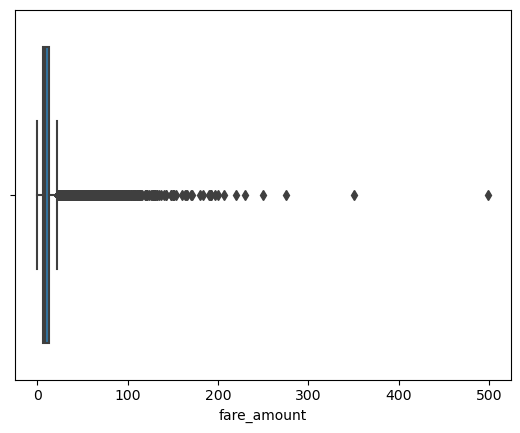

In [17]:
sns.boxplot(x=df["fare_amount"])
plt.show()

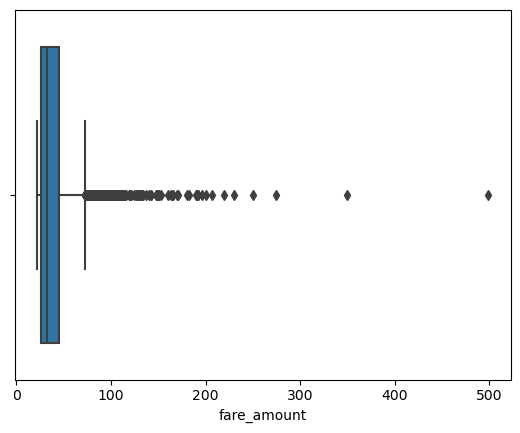

In [19]:
#outliers detection
# Calculate the IQR for the 'fare_amount' column
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR


#analyse
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
sns.boxplot(x=outliers["fare_amount"])
plt.show()



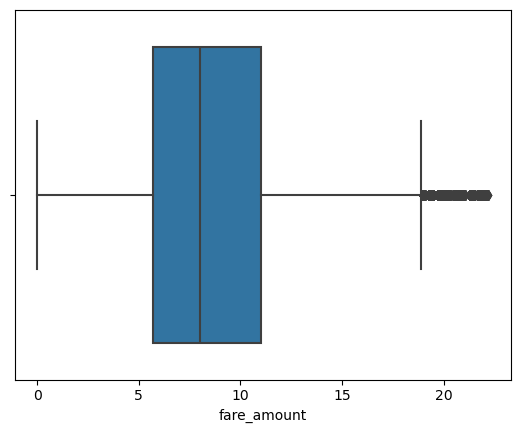

In [21]:
# Remove outliers
data_no_outliers = df[(df["fare_amount"] >= lower_bound) & (df["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

In [28]:
#check correlation
df_for_corr = df.drop(columns=[ 'pickup_datetime','day_of_week'])

correlation_matrix=df_for_corr.corr()
print(correlation_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.011645        -0.011570   
pickup_longitude      0.011645          1.000000        -0.979043   
pickup_latitude      -0.011570         -0.979043         1.000000   
dropoff_longitude     0.012152          0.949926        -0.936913   
dropoff_latitude     -0.012522         -0.936836         0.958347   
passenger_count       0.011026         -0.000778        -0.000584   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.012152         -0.012522         0.011026  
pickup_longitude            0.949926         -0.936836        -0.000778  
pickup_latitude            -0.936913          0.958347        -0.000584  
dropoff_longitude           1.000000         -0.979679        -0.000471  
dropoff_latitude           -0.979679          1.000000        -0.001408  
passenger_count            -0.000471         -0.001408         1.000000 

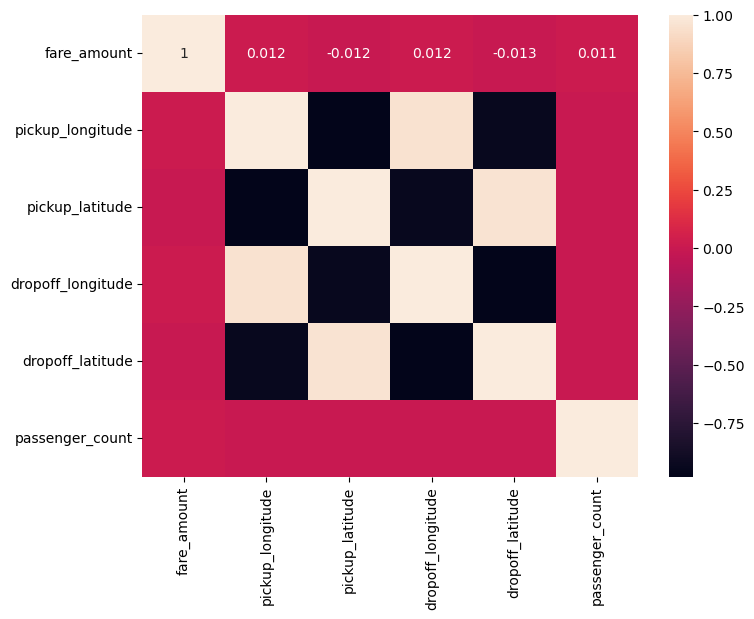

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [30]:
#Implement linear regression and random forest regression models

X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']  #Target

y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199965, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [41]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)



In [42]:
result = {}

In [43]:
#model implementation
# (i) Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr=lr_model.predict(X_test)

result['LinearRegression']={
    'R2': r2_score(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
}

In [44]:
print(result)

{'LinearRegression': {'R2': -0.00020695221726896307, 'MSE': 94.13927837485161, 'RMSE': 9.70253978991334}}


In [48]:
#(ii) Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
result['Random Forest'] = {
   'R2': r2_score(y_test, y_pred_rf),
   'MSE': mean_squared_error(y_test, y_pred_rf),
   'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
}

In [52]:
#iii ElasticNet\
from sklearn.linear_model import ElasticNet
en_model=ElasticNet()
en_model.fit(X_train,y_train)
y_pred_en=en_model.predict(X_test)
result['ElasticNet'] = {
   'R2': r2_score(y_test, y_pred_en),
   'MSE': mean_squared_error(y_test, y_pred_en),
   'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_en))
}

In [55]:
#ivXGBRegressor
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)
result['XGBRegressor'] = {
   'R2': r2_score(y_test, y_pred_xgb),
   'MSE': mean_squared_error(y_test, y_pred_xgb),
   'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb))
}

In [58]:
#v Poisson Regression
import statsmodels.api as sm
poisson_model=sm.GLM(y_train,X_train, family=sm.families.Poisson()).fit()
y_pred_poisson=poisson_model.predict(X_test)
result['Poisson Regression'] = {
   'R2': r2_score(y_test, y_pred_poisson),
   'MSE': mean_squared_error(y_test,y_pred_poisson),
   'RMSE': np.sqrt(mean_squared_error(y_test,y_pred_poisson))
}

In [59]:
# 5. Evaluate and compare models
results_df = pd.DataFrame(result).T
print(results_df)

                          R2         MSE       RMSE
LinearRegression   -0.000207   94.139278   9.702540
Random Forest       0.665832   31.451825   5.608193
Elastic Net        -0.000059   94.125391   9.701824
XGBRegressor        0.601189   37.536050   6.126667
Poisson Regression -1.125247  200.027853  14.143120


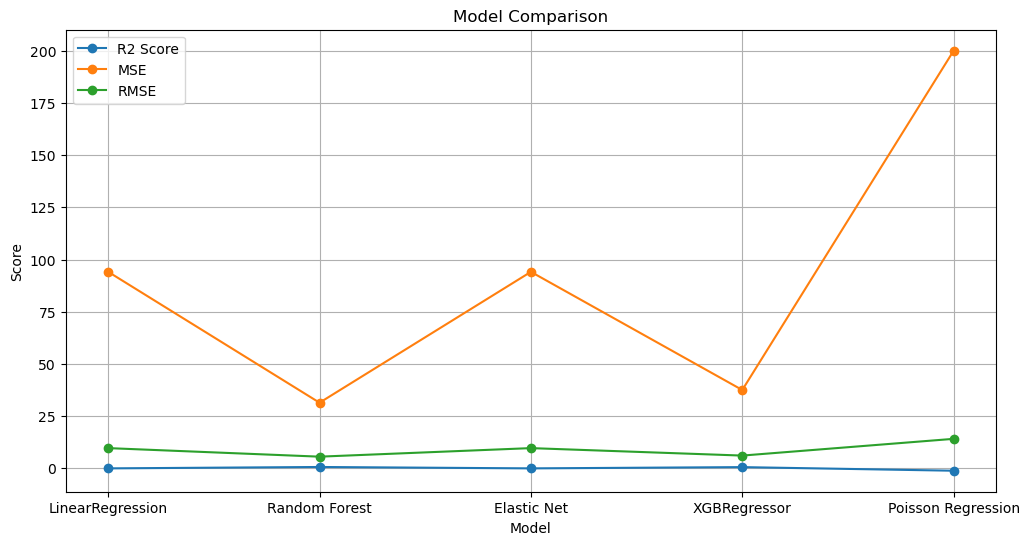

In [60]:
# 6. Plot the results
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['R2'], label='R2 Score', marker='o')
plt.plot(results_df.index, results_df['MSE'], label='MSE', marker='o')
plt.plot(results_df.index, results_df['RMSE'], label='RMSE', marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()